In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
data=pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv",sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.shape

(70000, 13)

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
data.duplicated().sum()

0

<Axes: >

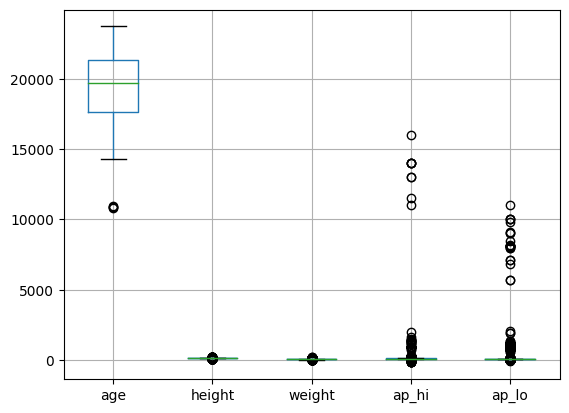

In [8]:
data[["age","height","weight","ap_hi","ap_lo"]].boxplot()

In [9]:
data["age"]=(data["age"]/365).values.astype(int)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
data["bmi"]=data["weight"]/((data["height"]/100)**2)
data.drop(["height","weight"],axis=1,inplace=True)
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177


<Axes: >

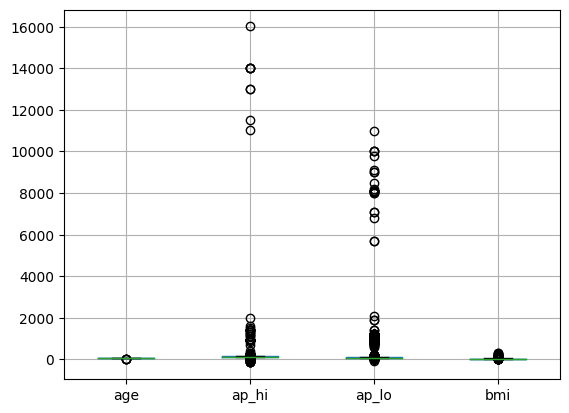

In [11]:
data[["age","ap_hi","ap_lo","bmi"]].boxplot()

In [12]:
data_num=data[["age","ap_hi","ap_lo","bmi"]]

In [13]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)

IQR=Q3-Q1
IQR

age      10.000000
ap_hi    20.000000
ap_lo    10.000000
bmi       6.347107
dtype: float64

In [14]:
outliers = ((data_num < (Q1 - 1.5 * IQR)) | (data_num > (Q3 + 1.5 * IQR))).any(axis=1)

print(outliers)

0        False
1        False
2        False
3        False
4         True
         ...  
69995    False
69996     True
69997     True
69998    False
69999    False
Length: 70000, dtype: bool


In [15]:
data=data[~outliers]

<Axes: >

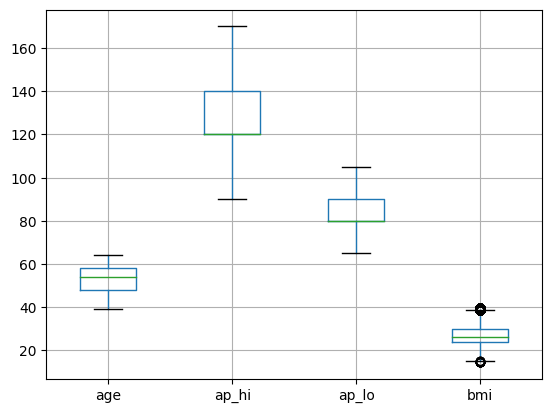

In [16]:
data[["age","ap_hi","ap_lo","bmi"]].boxplot()

In [17]:
data[["age","ap_hi","ap_lo","bmi"]].describe()

,age,ap_hi,ap_lo,bmi
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,126.404319,81.689537,27.034727
std,6.746333,14.296927,7.673500,4.406103
min,39.000000,90.000000,65.000000,14.479500
25%,48.000000,120.000000,80.000000,23.875115
50%,54.000000,120.000000,80.000000,26.222222
75%,58.000000,140.000000,90.000000,29.757585
max,64.000000,170.000000,105.000000,39.736121


In [18]:
data["cardio"].value_counts()

cardio
0    31783
1    30962
Name: count, dtype: int64

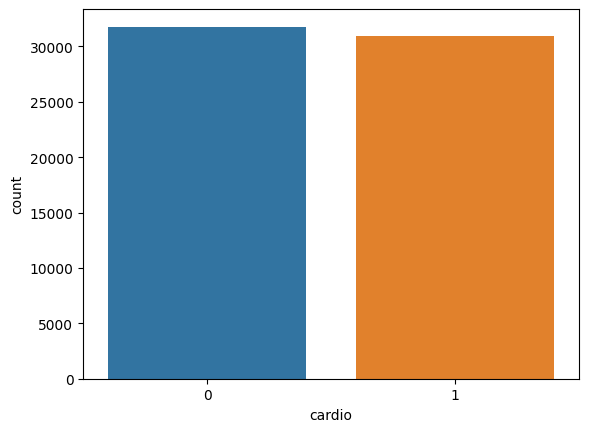

In [19]:
sns.countplot(data=data,x="cardio")
plt.show()

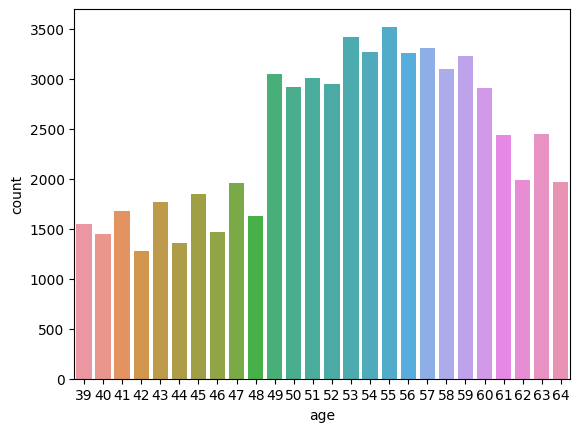

In [20]:
sns.countplot(data=data,x="age")
plt.show()

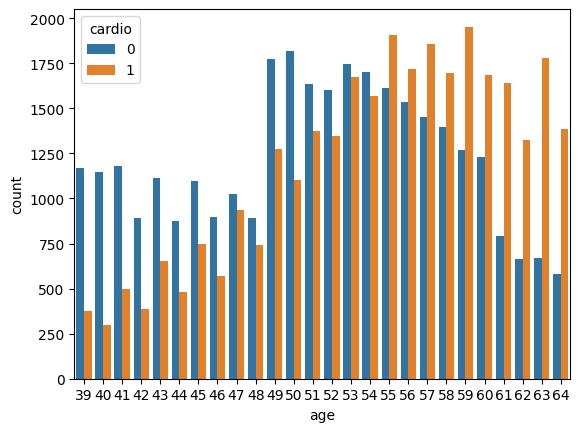

In [21]:
sns.countplot(data=data,x="age",hue="cardio")
plt.show()

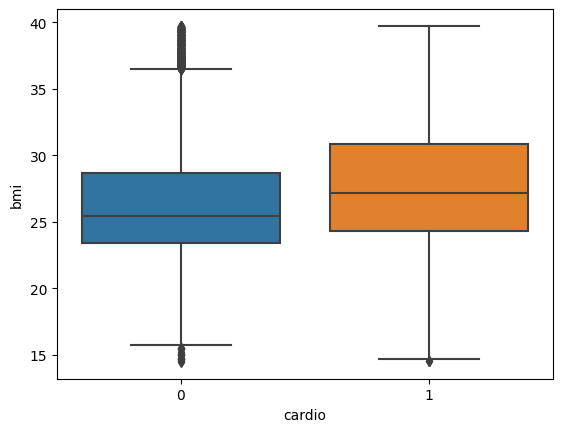

In [22]:
sns.boxplot(x="cardio",y="bmi",data=data)
plt.show()

<Axes: >

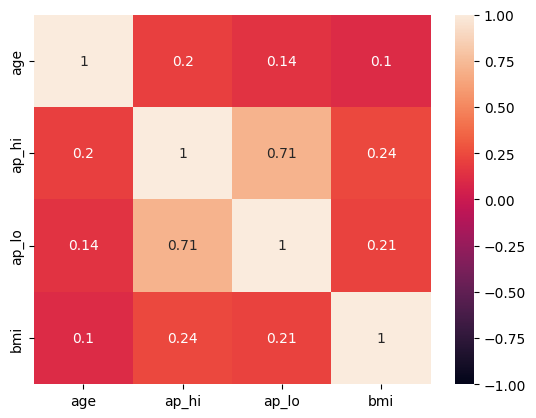

In [23]:
sns.heatmap(data[["age","ap_hi","ap_lo","bmi"]].corr(),annot=True,vmin=-1,vmax=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

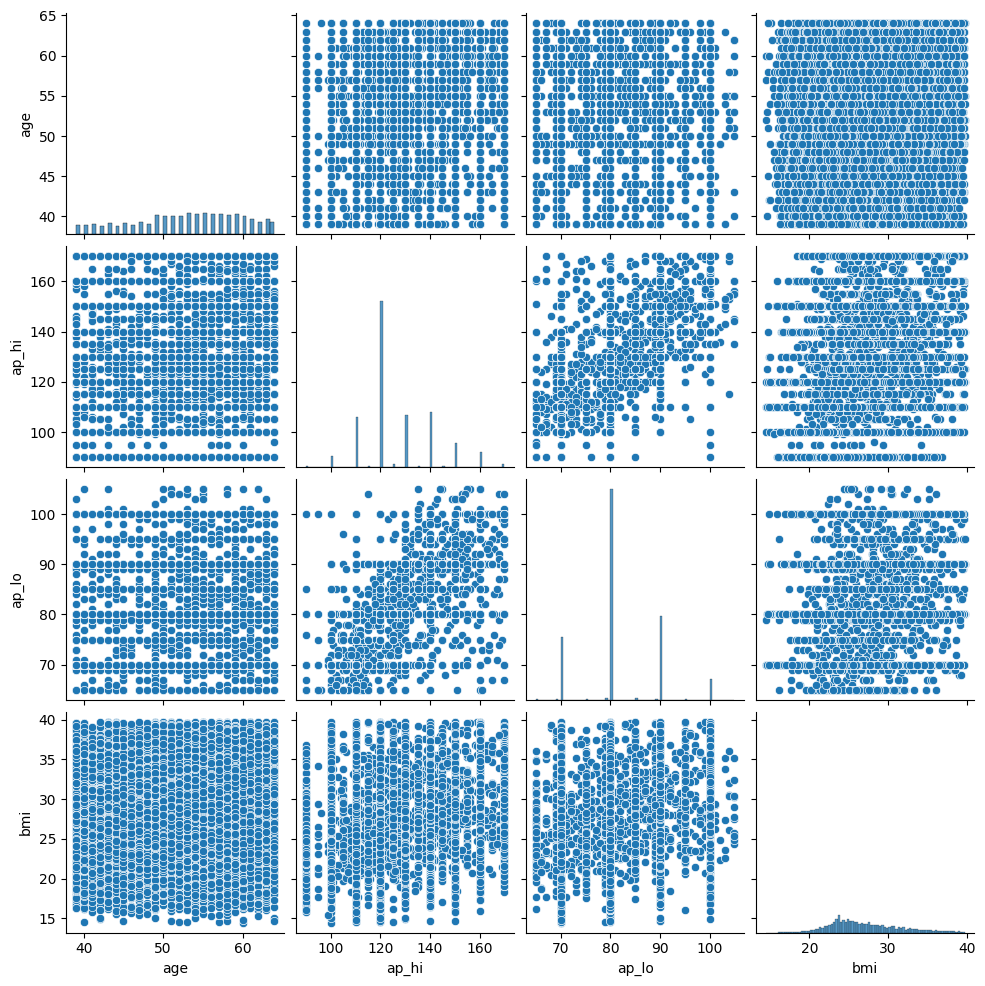

In [24]:
sns.pairplot(data[["age","ap_hi","ap_lo","bmi"]])
plt.show()

In [25]:
df=data[["age","ap_hi","ap_lo","bmi"]]
df["cardio"]=["yes" if m==1 else "No" for m in data["cardio"]]
df.head()

/tmp/ipykernel_18/2978758141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cardio"]=["yes" if m==1 else "No" for m in data["cardio"]]


,age,ap_hi,ap_lo,bmi,cardio
0,50,110,80,21.967120,No
1,55,140,90,34.927679,yes
2,51,130,70,23.507805,yes
3,48,150,100,28.710479,yes
5,60,120,80,29.384676,No


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

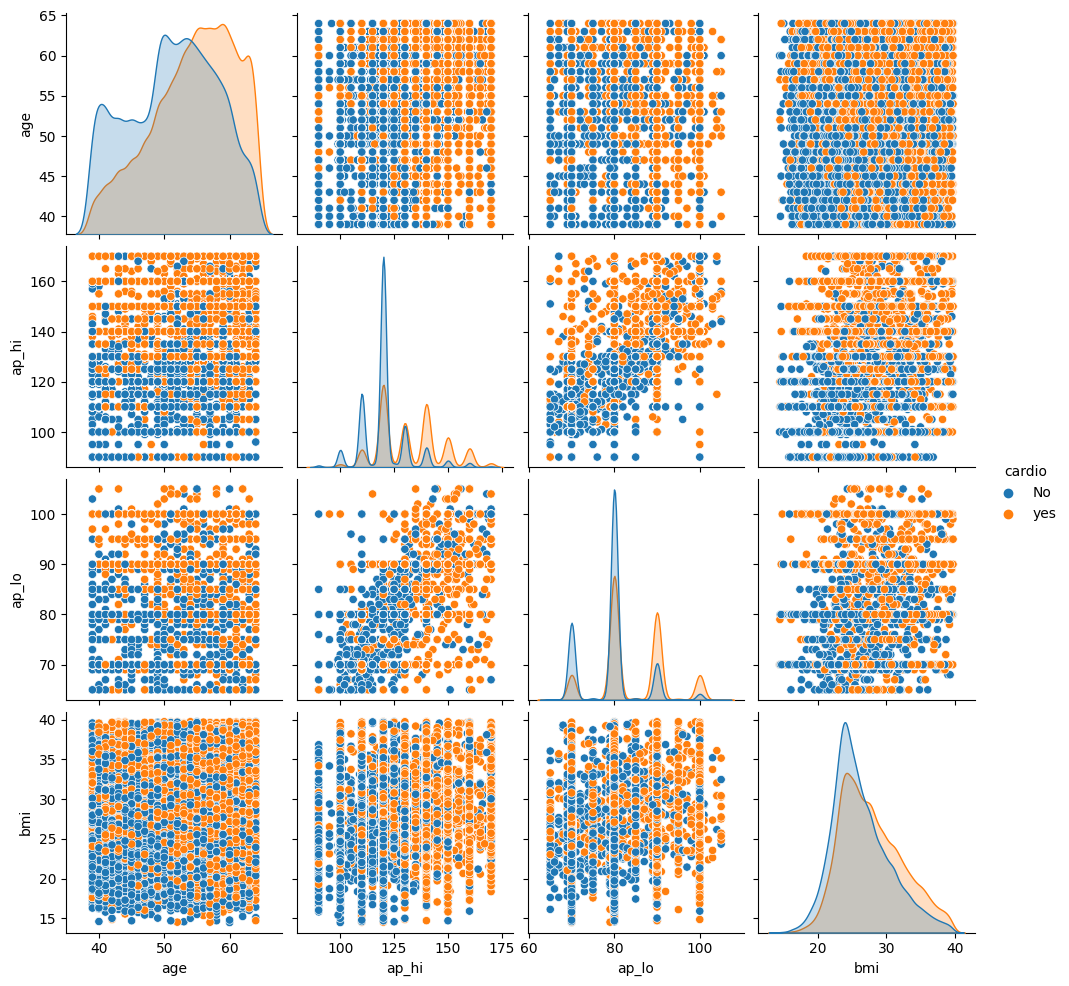

In [26]:
sns.pairplot(df,hue="cardio")
plt.show()

In [27]:
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676


In [28]:
data=data.reindex(columns=["age","ap_hi","ap_lo","bmi","gender","cholesterol","gluc","smoke","alco","active","cardio"])
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


In [29]:
data["gender"].value_counts()

gender
1    40289
2    22456
Name: count, dtype: int64

In [30]:
data["smoke"].value_counts()

smoke
0    57184
1     5561
Name: count, dtype: int64

In [31]:
data["cholesterol"].value_counts()

cholesterol
1    47420
2     8257
3     7068
Name: count, dtype: int64

In [32]:
data["alco"].value_counts()

alco
0    59413
1     3332
Name: count, dtype: int64

In [33]:
data["active"].value_counts()

active
1    50465
0    12280
Name: count, dtype: int64

In [34]:
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])

In [35]:
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [36]:
ohe=OneHotEncoder()


In [37]:
ohot_encode1=ohe.fit_transform(data["cholesterol"].values.reshape(len(data["cholesterol"].values),1)).toarray()
ohot_encode1=ohot_encode1[:,1:].astype(int)
df_ohot1=pd.DataFrame(ohot_encode1,columns=["Above Nor Chol","Well Above Nor Chol"])
df_ohot1

,Above Nor Chol,Well Above Nor Chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [38]:
ohot_encode2=ohe.fit_transform(data["gluc"].values.reshape(len(data["gluc"].values),1)).toarray()
ohot_encode2=ohot_encode2[:,1:].astype(int)
df_ohot2=pd.DataFrame(ohot_encode2,columns=["Above Nor  gluc","Well Above Nor Chol"])
df_ohot2

,Above Nor gluc,Well Above Nor Chol
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,1,0


In [39]:
data.reset_index(inplace=True)
data

,index,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [40]:
data.drop("index",axis=1,inplace=True)
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0


In [41]:
x=pd.concat([data.iloc[:,:10],df_ohot1,df_ohot2],axis=1)

In [42]:
x.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor gluc,Well Above Nor Chol
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0


In [43]:
x.drop(["cholesterol","gluc"],axis=1,inplace=True)

In [44]:
x.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor gluc,Well Above Nor Chol
0,50,110,80,21.967120,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,0,0,0,1,0,1,0


In [45]:
x=x.values
y=data.iloc[:,10].values

In [46]:
sc=StandardScaler()

In [47]:
x[:,:4]=sc.fit_transform(x[:,:4])

In [48]:
x[:,:4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [51]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=50)),
                             ('lgr', LogisticRegression()), ('svm', SVC(C=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [52]:
y_pred=model.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred)

array([[5197, 1218],
       [2229, 3905]])

In [54]:
accuracy_score(y_test,y_pred)

0.7253167583074348

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6415
           1       0.76      0.64      0.69      6134

    accuracy                           0.73     12549
   macro avg       0.73      0.72      0.72     12549
weighted avg       0.73      0.73      0.72     12549

